# Bank Deposit Prediction Using Supervised Learning

## Importing Required Libraries

In [29]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
#-----------------------------------------------------------------------------------------------------------
#Import required other libraries including Scikit-Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import matthews_corrcoef
from imblearn.under_sampling import RandomUnderSampler

## Data Loading

In [9]:
#Load data and read first few rows and display data types
dataSetBank = pd.read_csv("Bank Dataset.csv")
dataSetBank.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
#Display data types of attributes
dataSetBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data Clean-up

### Check for Missing Values

In [32]:
# Look for Missing Values
missingValues = dataSetBank.isnull()
missingValuesCount = missingValues.sum()
print(missingValuesCount)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Check for Null Values

In [33]:
# Look for dataset null values
dataSetBank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

### Check for Duplicates and Drop Duplicates

In [34]:
# Look for dataset duplicated values 
dataSetBank.duplicated().sum()

0

In [35]:
#Delete the identified duplicates 
dataSetBank.drop_duplicates(inplace=True)
dataSetBank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,4,1,3,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,8,1,4,2,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,8,1,4,0,1,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,1,1,5,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,8,1,4,0,0,1,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [36]:
#Look for duplicates again to reaffirm 
dataSetBank.duplicated().sum()

0

### Identify Outliers through Box Plots

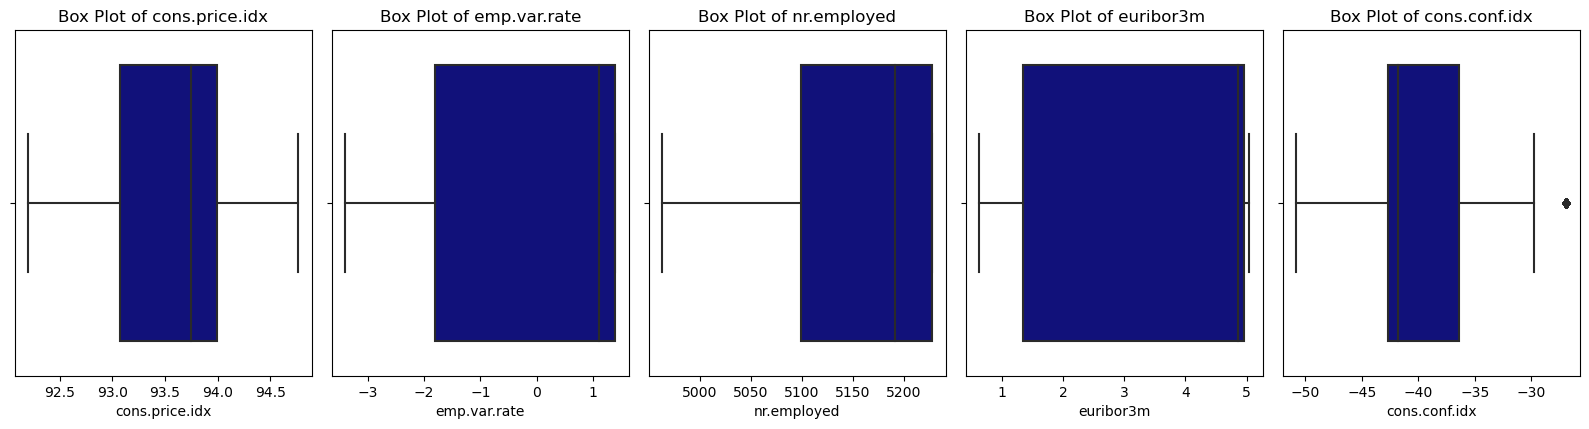

In [37]:
#Display Box Plots
boxPlotFeatureSet = ['cons.price.idx','emp.var.rate','nr.employed','euribor3m','cons.conf.idx']
plt.figure(figsize=(16, 8))
for k, feaArray in enumerate(boxPlotFeatureSet, 1):
    plt.subplot(2, 5, k)  
    sns.boxplot(x=df[feaArray], color='darkblue')
    plt.title(f'Box Plot of {feaArray}')
plt.tight_layout()
plt.show()

## Data Transformations

In [38]:
#Look whether data is equally distributed across the target
countEqual = dataSetBank['y'].value_counts()
print(countEqual)

0    36537
1     4639
Name: y, dtype: int64


Replace Target Attribute Values as Integer Values 

In [39]:
#Replace target attribute data with integer values
dataSetBank = dataSetBank.replace({'y': {'no':0, 'yes':1}})
dataSetBank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,4,1,3,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,8,1,4,2,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,8,1,4,0,1,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,1,1,5,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,8,1,4,0,0,1,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [40]:
#Replace Strings with Integers for other columns
dataSetBank = dataSetBank.replace({'day_of_week': {'fri':5, 'tue':2,'mon':1,'thu':4,'wed':3}})
dataSetBank = dataSetBank.replace({'housing': {'no':0, 'unknown':2, 'yes':1}})
dataSetBank = dataSetBank.replace({'contact': {'telephone':0, 'cellular':1}})
dataSetBank = dataSetBank.replace({'poutcome': {'nonexistent':2,'failure':0,'success':1}})
dataSetBank = dataSetBank.replace({'education': {'university.degree':0, 'basic.9y':1, 'illiterate':2, 'basic.4y':3, 'high.school':4, 'basic.6y':5, 'professional.course':6, 'unknown':7}})
dataSetBank = dataSetBank.replace({'default': {'unknown':2,'no':0, 'yes':1}})
dataSetBank = dataSetBank.replace({'marital': {'unknown':3, 'married':1, 'single':0, 'divorced':2}})
dataSetBank = dataSetBank.replace({'loan': {'unknown':2, 'yes':1,'no':0}})
dataSetBank = dataSetBank.replace({'month': {'dec':12,'may':5, 'jul':7, 'jan':1, 'apr':4, 'sep':9,'nov':11,'feb':2,'aug':8,'mar':3,'jun':6,'oct':10}})
dataSetBank = dataSetBank.replace({'job': {'technician':1,'entrepreneur':2,'housemaid':3,'retired':4, 'student':5, 'admin.':6, 'blue-collar':7,'unknown':12, 'unemployed':8, 'management':9,'services':10,'self-employed':11}})
dataSetBank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,4,1,3,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,8,1,4,2,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,8,1,4,0,1,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,1,1,5,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,8,1,4,0,0,1,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0


In [41]:
#Look at the Job column integer replacements to affirm
JobColData = dataSetBank['job'].tolist()
print(JobColData)

[4, 8, 8, 1, 8, 8, 1, 2, 10, 8, 2, 8, 2, 4, 2, 6, 2, 2, 2, 5, 11, 2, 6, 10, 1, 10, 10, 7, 10, 12, 1, 10, 2, 5, 2, 12, 8, 10, 1, 10, 5, 3, 1, 1, 1, 10, 1, 2, 1, 2, 1, 4, 1, 1, 2, 10, 5, 8, 11, 10, 3, 2, 2, 2, 1, 1, 2, 1, 1, 2, 5, 5, 1, 12, 1, 2, 10, 8, 5, 2, 2, 2, 1, 3, 10, 1, 5, 1, 10, 1, 1, 12, 1, 11, 2, 8, 5, 1, 10, 2, 8, 2, 8, 1, 1, 8, 4, 1, 3, 10, 6, 11, 8, 2, 5, 2, 1, 2, 1, 2, 2, 2, 8, 10, 1, 1, 1, 10, 6, 10, 2, 10, 2, 2, 5, 5, 4, 2, 8, 2, 11, 5, 5, 2, 12, 2, 2, 1, 1, 2, 2, 3, 8, 3, 2, 2, 2, 2, 10, 8, 5, 2, 2, 2, 8, 3, 8, 1, 2, 5, 2, 8, 10, 1, 8, 5, 8, 1, 8, 2, 10, 2, 2, 1, 2, 5, 10, 6, 2, 1, 10, 2, 5, 10, 2, 2, 1, 2, 1, 2, 8, 8, 2, 1, 2, 9, 9, 11, 8, 9, 9, 4, 1, 6, 2, 4, 2, 2, 4, 8, 1, 10, 8, 10, 10, 6, 10, 1, 6, 2, 1, 8, 5, 1, 7, 1, 2, 1, 8, 5, 6, 10, 5, 8, 10, 8, 10, 10, 2, 8, 10, 2, 8, 10, 8, 8, 2, 5, 10, 1, 1, 2, 10, 1, 1, 2, 7, 9, 5, 7, 11, 5, 4, 1, 4, 2, 8, 2, 10, 6, 2, 10, 1, 2, 2, 2, 4, 1, 2, 8, 5, 1, 10, 2, 10, 7, 2, 1, 8, 12, 8, 2, 6, 12, 1, 1, 2, 4, 1, 2, 5, 1, 1, 2, 5

In [42]:
#Initiate to Scale Data 
DataScaling = MinMaxScaler()
scaleFeatures = ['euribor3m','campaign','age', 'previous', 'duration','cons.conf.idx','nr.employed','cons.price.idx','nr.employed','pdays','emp.var.rate']
dataSetBank[scaleFeatures] = DataScaling.fit_transform(dataSetBank[scaleFeatures])
dataSetBank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.481481,4,1,3,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.493827,8,1,4,2,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.246914,8,1,4,0,1,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.283951,1,1,5,0,0,0,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.481481,8,1,4,0,0,1,0,5,1,...,0.0,1.0,0.0,2,0.9375,0.698753,0.60251,0.957379,0.859735,0


## Data Visualizations

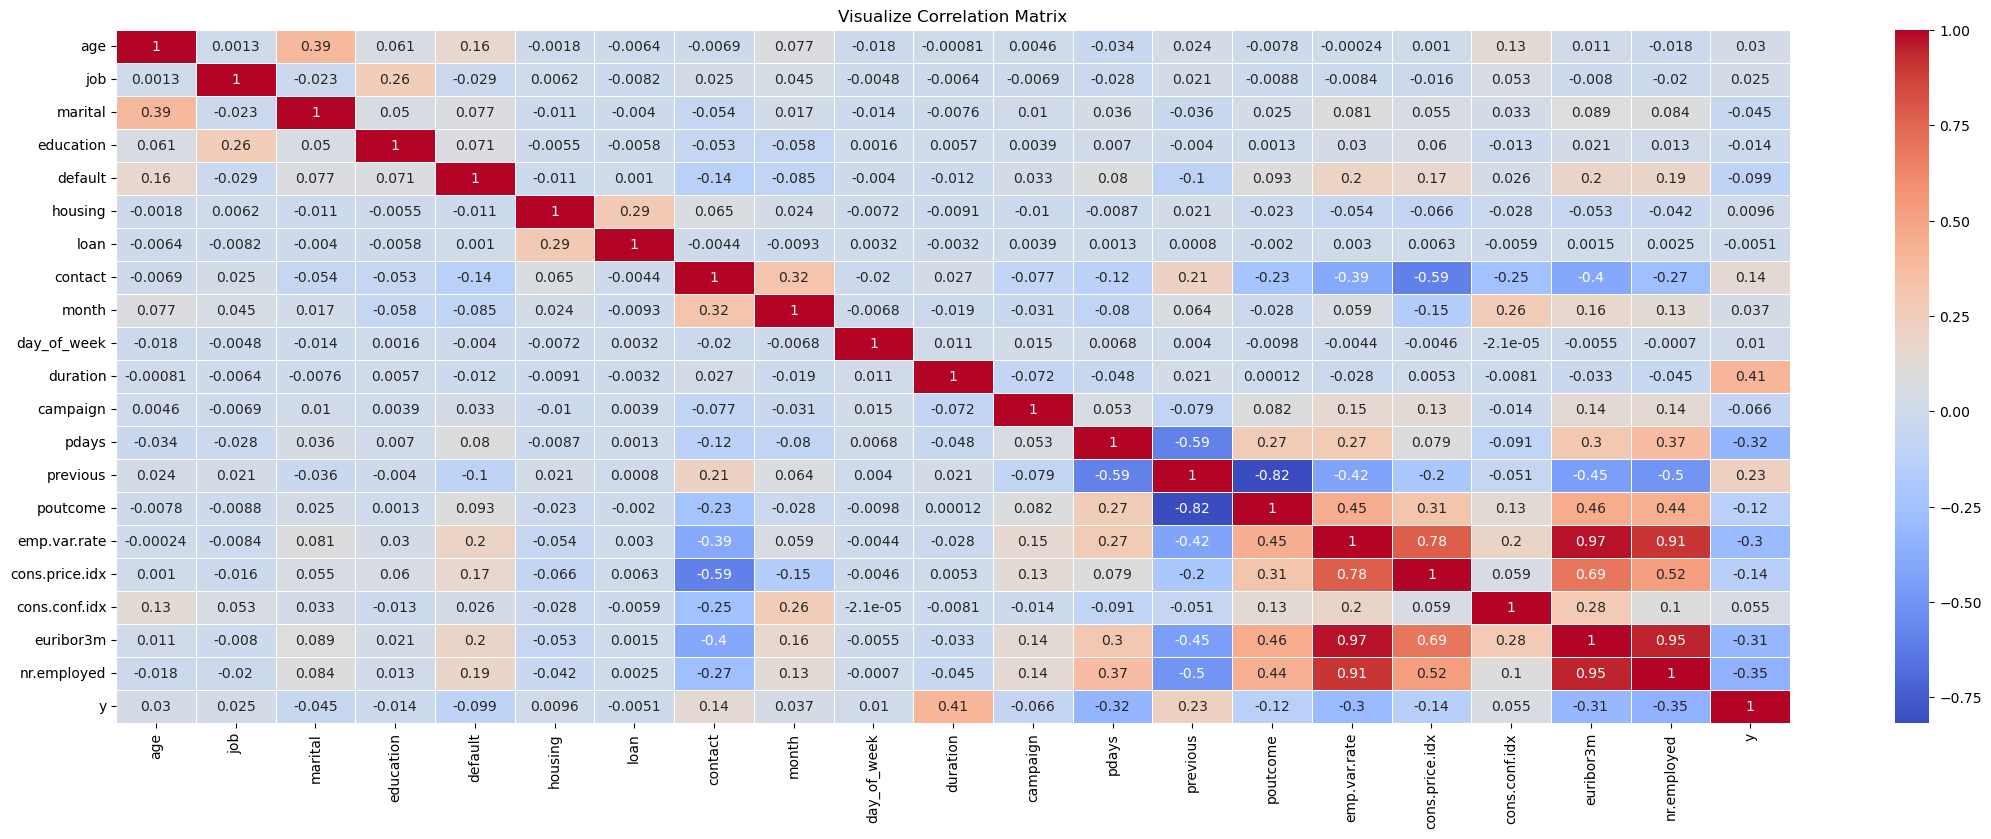

In [44]:
# Visualize Correlation Matrix
visualizeCorrMatrix = dataSetBank.corr()
plt.figure(figsize=(27, 9))
sns.heatmap(visualizeCorrMatrix, annot=True, cmap='coolwarm', linewidths=0.7)
plt.title("Visualize Correlation Matrix")
plt.show()

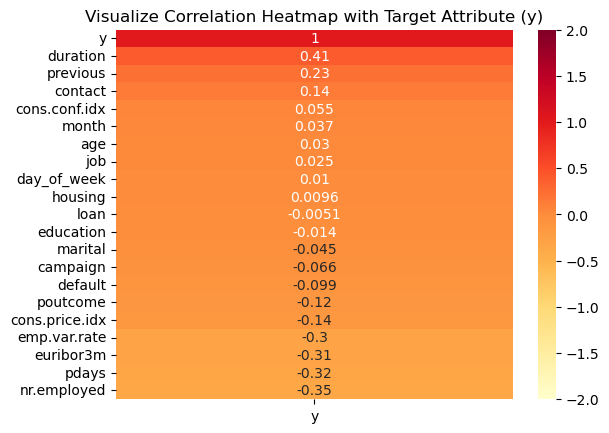

In [47]:
# Check for correlations between Level and other attributes
visualizeCorrHeatmap = dataSetBank.corr()
sns.heatmap(visualizeCorrHeatmap [['y']].sort_values(by='y', ascending=False), cmap='YlOrRd',annot=True, vmax=2, vmin=-2)
plt.title("Visualize Correlation Heatmap with Target Attribute (y)")
plt.show()

## Data Splitting

In [48]:
# Initiate splitting of data, target and others
Y = dataSetBank["y"]
X = dataSetBank.drop('y', axis=1)

In [49]:
#--Test using under sampler--
# #Train/Test Data Split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Instantiate the RandomUnderSampler
# undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# # Fit and transform the training data
# X_train_resampled, Y_train_resampled = undersampler.fit_resample(X_train, Y_train)

# print(f"Training set size: {X_train_resampled.shape[0]} samples")
# print(f"Test set size: {X_test.shape[0]} samples")

In [52]:
#Split Data int Training and Testing Sub-Sets 
X_TrainSet, X_TestSet, Y_TrainSet, Y_TestSet = train_test_split( X, Y,random_state=42, test_size=0.2)

print(f"Size of Training Dataset: {X_TrainSet.shape[0]} samples")
print(f"Size of Test Dataset: {X_TestSet.shape[0]} samples")

Size of Training Dataset: 32940 samples
Size of Test Dataset: 8236 samples


# Model Development and Testing 

### Logistic Regression (LR)

In [132]:
#Building the LR Model
LogisticReg = LogisticRegression(C=1, max_iter=10000, penalty='l2', solver='saga')
LogisticRegModel= LogisticReg.fit(X_TrainSet, Y_TrainSet)
LogisticRegPredictTrain = LogisticRegModel.predict(X_TrainSet)
LogisticRegPredictTest=LogisticRegModel.predict(X_TestSet)

#Calculating the Accuracy
train_accuracyLR = accuracy_score(Y_TrainSet, LogisticRegPredictTrain)*100
print("Training Accuracy:", f"{train_accuracyLR:.2f}%")
test_accuracyLR = accuracy_score(Y_TestSet, LogisticRegPredictTest)*100
print("Test Accuracy:", f"{test_accuracyLR:.2f}%")

Training Accuracy: 90.94%
Test Accuracy: 91.26%


##### Other Accuracy Metrics for Logistic Regression Model

In [55]:
# Classification Reports -  Logistic Regression Model 
print("Classification Report - Train Dataset of LR")
print(classification_report(Y_TrainSet,LogisticRegPredictTrain))
print("")
print("Classification Report - Test Dataset of LR")
print(classification_report(Y_TestSet,LogisticRegPredictTest))

Classification Report - Train Dataset of LR
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29272
           1       0.68      0.39      0.50      3668

    accuracy                           0.91     32940
   macro avg       0.81      0.68      0.72     32940
weighted avg       0.90      0.91      0.90     32940


Classification Report - Test Dataset of LR
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7265
           1       0.66      0.36      0.47       971

    accuracy                           0.90      8236
   macro avg       0.79      0.67      0.71      8236
weighted avg       0.89      0.90      0.89      8236



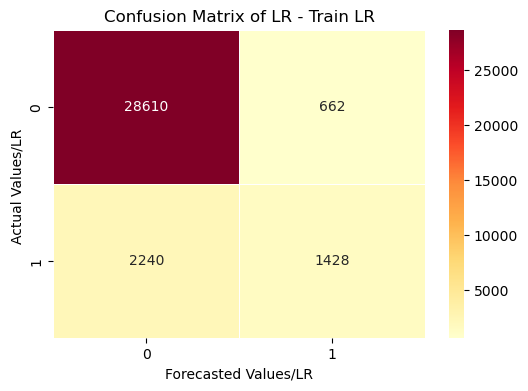

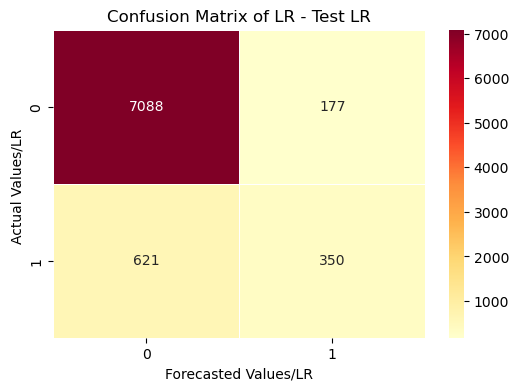

In [57]:
#Develop Confusion Matrix for LR Training and Test Sets 
def plot_confusion_matrix(y_true, y_pred, set_name):
    confusionMatrixLR = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusionMatrixLR, annot=True, fmt='d', cmap='YlOrRd', linewidths=0.5)
    plt.xlabel('Forecasted Values/LR')
    plt.ylabel('Actual Values/LR ')
    plt.title(f'Confusion Matrix of LR - {set_name}')
    plt.show()

# Display confusion matrices for train and test sets
plot_confusion_matrix(Y_TrainSet, LogisticRegPredictTrain, 'Train LR')
plot_confusion_matrix(Y_TestSet, LogisticRegPredictTest, 'Test LR')

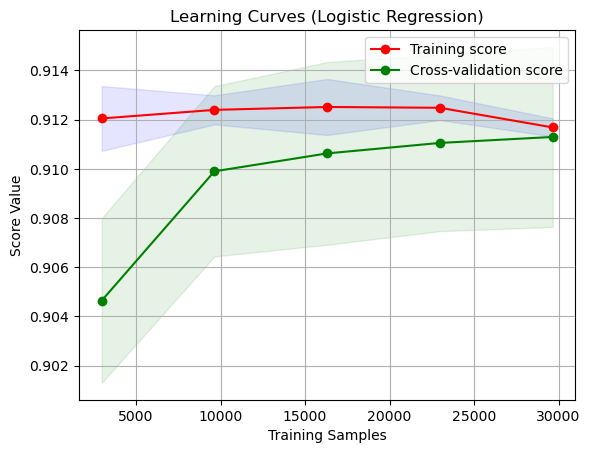

In [59]:
#Logistic Regression Lerning Curve/Scores 
def plot_learning_curves(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training Samples")
    plt.ylabel("Score Value")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves (Logistic Regression)"
cv = 10  # Number of cross-validation folds
plot_learning_curves(LogisticRegModel, title, X_TrainSet, Y_TrainSet, cv=cv)
plt.show()

### K-Fold Cross-Validation of Logistic Regression

In [70]:
SplitCont = 7
KFold = StratifiedKFold(n_splits=SplitCont,random_state=42, shuffle=True)

scoreAccuracy = []
scoreF1 = []
scorePrecision = []
scoreRecall = []


for train_index, test_index in KFold.split(X, Y):
    X_TrainSet, X_TestSet = X.iloc[train_index], X.iloc[test_index]
    Y_TrainSet, Y_TestSet = Y.iloc[train_index], Y.iloc[test_index]

    # Train the LR model on Training Data
    Kmodel = LogisticRegression(C=1.5, max_iter=10000, penalty='l2')
    Kmodel.fit(X_TrainSet,  Y_TrainSet)

    # Test Prediction 
    Y_pred = Kmodel.predict(X_TestSet)
  

    # Evaluate the model and store the metrics
    evaluateAccuracy = accuracy_score(Y_TestSet, Y_pred)
    evaluatePrecision = precision_score(Y_TestSet, Y_pred)
    evaluateRecall = recall_score(Y_TestSet, Y_pred)
    evaluateF1 = f1_score(Y_TestSet, Y_pred)

    scoreAccuracy.append(evaluateAccuracy)
    scorePrecision.append(evaluatePrecision)
    scoreRecall.append(evaluateRecall)
    scoreF1.append(evaluateF1)

# Calculate the mean and standard deviation fold metrics
accuracyMEAN = np.mean(scoreAccuracy)
accracySTD = np.std(scoreAccuracy)
precisionMEAN = np.mean(scorePrecision)
recallMEAN = np.mean(scoreRecall)
f1MEAN = np.mean(scoreF1)

# Display the cross-validated results, Cross-Validated (CV)
print(f"Accuracy - CV: {accuracyMEAN:.2f} ± {accracySTD:.2f}")
print(f"Precision - CV: {precisionMEAN:.2f}")
print(f"Recall - CV: {recallMEAN:.2f}")
print(f"F1 Score - CV: {f1MEAN:.2f}")

Accuracy - CV: 0.91 ± 0.00
Precision - CV: 0.67
Recall - CV: 0.39
F1 Score - CV: 0.49


### Logistic Regression with PCA

In [92]:
dataScaling = StandardScaler()
X_scaledTrain = dataScaling.fit_transform(X_TrainSet)
X_scaledTest = dataScaling.transform(X_TestSet)

componentscount = 10
LRPCAModel = PCA(n_components=componentscount)
X_LRPCATrain = LRPCAModel.fit_transform(X_scaledTrain)
X_LRPCATest = LRPCAModel.transform(X_scaledTest)

In [93]:
LogisticRegPCA = LogisticRegression(C=1.5, max_iter=10000, penalty='l2')
LogisticRegPCAModel = LogisticRegPCA.fit(X_LRPCATrain, Y_TrainSet)
LogisticRegPCAModelTest = LogisticRegPCA.fit(X_LRPCATest, Y_TestSet)

#Predict on the training set
LRPCAPredTrain = LogisticRegPCAModel.predict(X_LRPCATrain)
# Predict on the test set
LRPCAPredTest = LogisticRegPCAModelTest.predict(X_LRPCATest)

In [94]:
LRPCAPredTrainAccuracy = (accuracy_score(Y_TrainSet, LRPCAPredTrain))*100
print(f"Train Accuracy LR with PCA: {LRPCAPredTrainAccuracy:.2f}")
LRPCAPredTestAccuracy = (accuracy_score(Y_TestSet, LRPCAPredTest))*100
print(f"Test Accuracy LR with PCA: {LRPCAPredTestAccuracy:.2f}")

Train Accuracy LR with PCA: 90.77
Test Accuracy LR with PCA: 90.77


In [76]:
# Classification Reports -  Logistic Regression Model 
print("Classification Report LR with PCA - Training Data")
print(classification_report(Y_TrainSet, LRPCAPredTrain))
print("")
print("Classification Report LR with PCA - Test")
print(classification_report(Y_TestSet,LRPCAPredTest))

Classification Report LR with PCA - Training Data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31318
           1       0.67      0.36      0.47      3976

    accuracy                           0.91     35294
   macro avg       0.79      0.67      0.71     35294
weighted avg       0.89      0.91      0.90     35294


Classification Report LR with PCA - Test
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5219
           1       0.66      0.38      0.48       663

    accuracy                           0.91      5882
   macro avg       0.79      0.68      0.72      5882
weighted avg       0.89      0.91      0.90      5882



### Support Vector Machine (SVM)

In [77]:
#Support Vector Machine Model Development
SVectorMM = SVC(kernel='linear', C=4, gamma=5)
SVMModel = SVectorMM.fit(X_TrainSet, Y_TrainSet)
# Firritng the Model (SVM) 
SVModelTrain = SVMModel.predict(X_TrainSet)
SVModelTest = SVMModel.predict(X_TestSet)

In [78]:
SVMTrnAccuracy = (accuracy_score(Y_TrainSet, SVModelTrain))*100
print(f"Training Accuracy: {SVMTrnAccuracy:.2f}")
SVMTestAccuracy = (accuracy_score(Y_TestSet, SVModelTest))*100
print(f"Test Accuracy: {SVMTestAccuracy:.2f}")

Training Accuracy: 90.09
Test Accuracy: 90.22


##### Other Metrics for SVM Evaluation 

In [79]:
# Develop SVM Classification Report
print("Classification Report SVM Training Data")
print(classification_report(Y_TrainSet, SVModelTrain, zero_division=0))

Classification Report SVM Training Data
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     31318
           1       0.64      0.28      0.39      3976

    accuracy                           0.90     35294
   macro avg       0.78      0.63      0.67     35294
weighted avg       0.88      0.90      0.88     35294



In [80]:
print("Classification Report SVM Testing Data")
print(classification_report(Y_TestSet,SVModelTest, zero_division=0))

Classification Report SVM Testing Data
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5219
           1       0.65      0.29      0.40       663

    accuracy                           0.90      5882
   macro avg       0.78      0.63      0.67      5882
weighted avg       0.89      0.90      0.89      5882



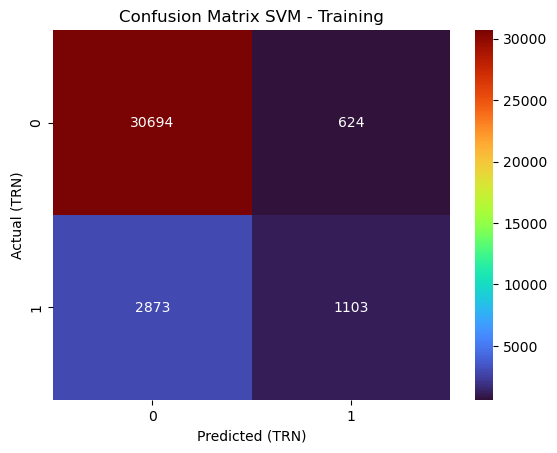

In [82]:
#Confusion Matrix of Actual and Predicted Values - SVM Training Data
SVMConfusionM = confusion_matrix(Y_TrainSet, SVModelTrain)
sns.heatmap(SVMConfusionM , cmap='turbo', fmt='d', annot=True)
plt.xlabel('Predicted (TRN)')
plt.ylabel('Actual (TRN)')
plt.title('Confusion Matrix SVM - Training')
plt.show()

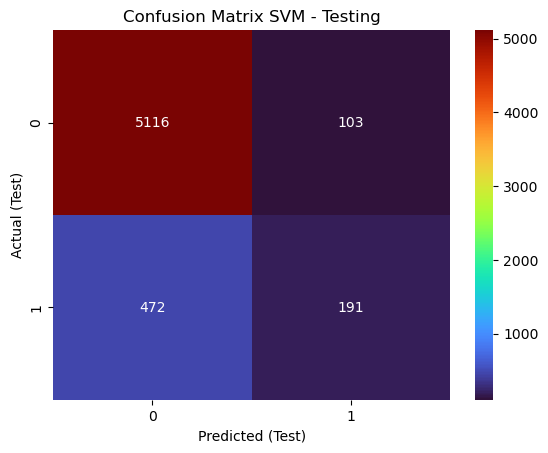

In [83]:
#Confusion Matrix of Actual and Predicted Values - SVM Testing Data
SVMConfusionM2 = confusion_matrix(Y_TestSet,SVModelTest)
sns.heatmap(SVMConfusionM2 ,cmap='turbo',fmt='d', annot=True)
plt.xlabel('Predicted (Test)')
plt.ylabel('Actual (Test)')
plt.title('Confusion Matrix SVM - Testing')
plt.show()

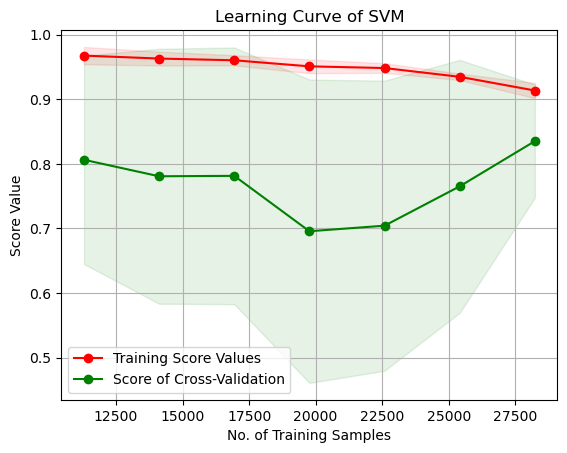

In [85]:
#SVM Model Learning Curve (LC)
sizeTrain, scoreTrain, scoreTest = learning_curve(
    SVMModel, X_TrainSet, Y_TrainSet, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the scores
MEANTrnScores = np.mean(scoreTrain, axis=1)
STDTrnScores = np.std(scoreTrain, axis=1)
MEANTestScores = np.mean(scoreTest, axis=1)
STDTestScores = np.std(scoreTest, axis=1)

# Create a line plot to visualize the training and cross-validation scores
plt.figure()
plt.title("Learning Curve of SVM")
plt.xlabel("No. of Training Samples")
plt.ylabel("Score Value")
plt.grid()

plt.fill_between(sizeTrain, MEANTrnScores - STDTrnScores,
                 MEANTrnScores + STDTrnScores, alpha=0.1, color="r")
plt.fill_between(sizeTrain, MEANTestScores - STDTestScores,
                 MEANTestScores + STDTestScores, alpha=0.1, color="g")

plt.plot(sizeTrain, MEANTrnScores, 'o-', color="r", label="Training Score Values")
plt.plot(sizeTrain, MEANTestScores, 'o-', color="g", label="Score of Cross-Validation")

plt.legend(loc="best")
plt.show()

### SVM with PCA

In [95]:
#Scaling data prior model building
dataScaler = StandardScaler()
X_scaledTraining = dataScaler.fit_transform(X_TrainSet)
X_scaledTesting = dataScaler.transform(X_TestSet)

componentsNumber = 10
SVMPCA1 = PCA(n_components=componentsNumber)
X_SVMPCATraining = SVMPCA1.fit_transform(X_scaledTraining)
X_SVMPCATesting = SVMPCA1.transform(X_scaledTesting)

In [96]:
SVectorMMPCA = SVC(kernel='linear', C=4, gamma=5)
SVMModelPCA = SVectorMMPCA.fit(X_SVMPCATraining, Y_TrainSet)
#SVM with PCA Predictions - Test Data
SVPredictPCATest=SVMModelPCA.predict(X_SVMPCATesting)
#SVM with PCA Predictions - Test Data
SVPredictPCATrain=SVMModelPCA.predict(X_SVMPCATraining)

In [97]:
accuracySVMPCATrain = (accuracy_score(Y_TrainSet,SVPredictPCATrain))*100
print(f"Train Accuracy of SVM with PCA: {accuracySVMPCATrain:.2f}%")
accuracySVMPCATest = (accuracy_score(Y_TestSet,SVPredictPCATest))*100
print(f"Test Accuracy of SVM with PCA: {accuracySVMPCATest:.2f}%")

Train Accuracy of SVM with PCA: 90.55%
Test Accuracy of SVM with PCA: 90.56%


In [98]:
print("Classification Report SVM with PCA Testing")
print(classification_report(SVPredictPCATest,Y_TestSet,zero_division=0))

Classification Report SVM with PCA Testing
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5552
           1       0.33      0.66      0.44       330

    accuracy                           0.91      5882
   macro avg       0.65      0.79      0.69      5882
weighted avg       0.94      0.91      0.92      5882



## Comparison of the Models

### Compasion of Accuracy

In [101]:
accuracy_data = [
    ['Logistic Regression - Test Accuracy', f'{test_accuracyLR:.2f}%'],
    ['Logistic Regression (PCA)- Test Accuracy', f'{LRPCAPredTestAccuracy:.2f}%'],
    ['Support Vector Machine- Test Accuracy', f'{SVMTestAccuracy:.2f}%'],
    ['Support Vector Machine (PCA)- Test Accuracy', f'{accuracySVMPCATest:.2f}%']
]
table = tabulate(accuracy_data, headers=['Model', 'Accuracy%'], tablefmt='pretty')
print(table)

+---------------------------------------------+-----------+
|                    Model                    | Accuracy% |
+---------------------------------------------+-----------+
|     Logistic Regression - Test Accuracy     |  90.31%   |
|  Logistic Regression (PCA)- Test Accuracy   |  90.77%   |
|    Support Vector Machine- Test Accuracy    |  90.22%   |
| Support Vector Machine (PCA)- Test Accuracy |  90.56%   |
+---------------------------------------------+-----------+


### ROC Curve Performance

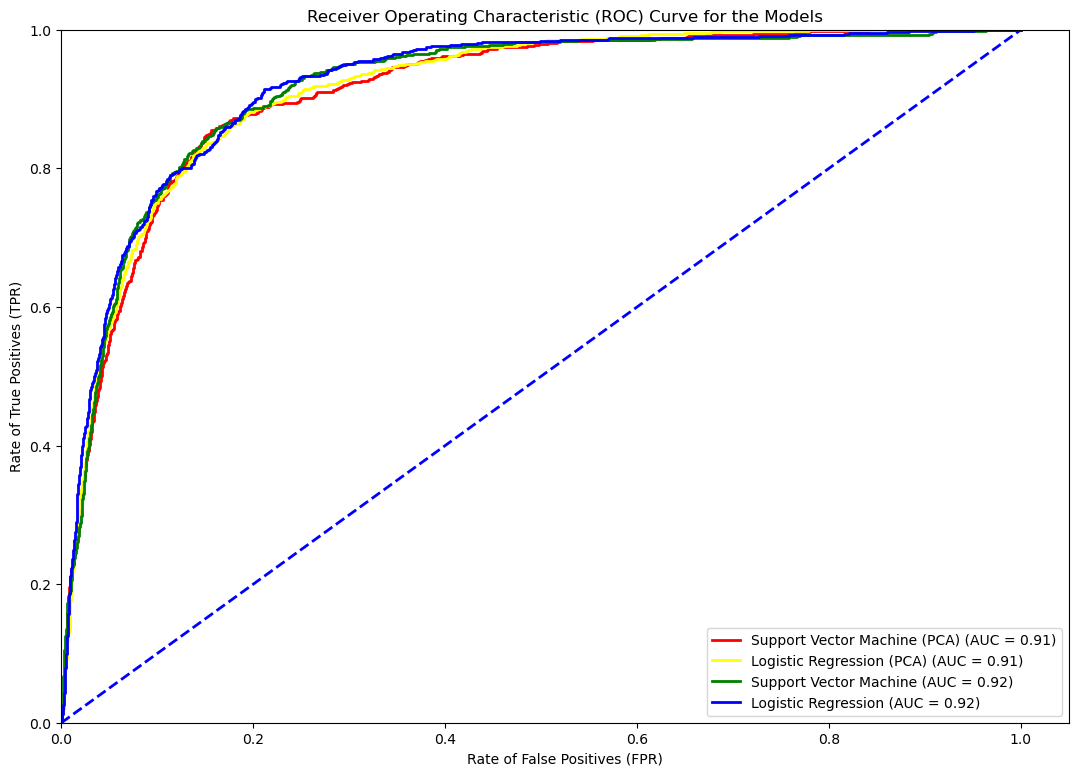

In [108]:
# Logistic Regression
probs_LR = LogisticRegModel.predict_proba(X_TestSet)[:, 1] 
# Logistic Regression with PCA
probs_LR_PCA = LogisticRegPCAModel.predict_proba(X_LRPCATest)[:, 1] 
# Support Vector Machine
probs_SVM = SVMModel.decision_function(X_TestSet)  
# Support Vector Machine with PCA
probs_SVM_PCA = SVMModelPCA.decision_function(X_SVMPCATesting) 

# Calculate ROC curves for each model mentioned above. 
fprLR, tprLR, thresholdsLR = roc_curve(Y_TestSet, probs_LR)
fprLRPCA, tprLRPCA, thresholdsLRPCA = roc_curve(Y_TestSet, probs_LR_PCA)
fprSVM, tprSVM, thresholdsSVM = roc_curve(Y_TestSet, probs_SVM)
fprSVMPCA, tprSVMPCA, thresholdsSVMPCA = roc_curve(Y_TestSet, probs_SVM_PCA)

# Calculate eachmodel's AUC Values 
AUCofLR = auc(fprLR, tprLR)
AUCofLRPCA = auc(fprLRPCA, tprLRPCA)
AUCofSVM = auc(fprSVM, tprSVM)
AUCofSVMPCA = auc(fprSVMPCA, tprSVMPCA)

# Create subplots for ROC curves of all models
plt.figure(figsize=(13, 9))
plt.plot(fprSVMPCA, tprSVMPCA, color='red', lw=2, label=f'Support Vector Machine (PCA) (AUC = {AUCofSVMPCA:.2f})')
plt.plot(fprLRPCA, tprLRPCA, color='yellow', lw=2, label=f'Logistic Regression (PCA) (AUC = {AUCofLRPCA:.2f})')
plt.plot(fprSVM, tprSVM, color='green', lw=2, label=f'Support Vector Machine (AUC = {AUCofSVM:.2f})')
plt.plot(fprLR, tprLR, color='blue', lw=2, label=f'Logistic Regression (AUC = {AUCofLR:.2f})')


plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.ylim([0.0, 1.0])
plt.ylabel('Rate of True Positives (TPR)')
plt.xlim([0.0, 1.05])
plt.xlabel('Rate of False Positives (FPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for the Models')
plt.legend(loc="lower right")
plt.show()

In [134]:
#Calculating Matthews Corr for all bove models 
mcc = matthews_corrcoef(Y_TestSet, SVPredictPCATest)
print(f"Matthews Correlation Coefficient (MCC) for SVM Model with PCA: {mcc:.2f}")
mcc2 = matthews_corrcoef(Y_TestSet, SVModelTest)
print(f"Matthews Correlation Coefficient (MCC) for SVM Model: {mcc2:.2f}")
mcc3 = matthews_corrcoef(Y_TestSet, LRPCAPredTest)
print(f"Matthews Correlation Coefficient (MCC) for LR Model with PCA: {mcc3:.2f}")
mcc4 = matthews_corrcoef(Y_TestSet, LogisticRegPredictTest)
print(f"Matthews Correlation Coefficient (MCC) for LR Model with PCA: {mcc4:.2f}")

Matthews Correlation Coefficient (MCC) for SVM Model with PCA: 0.42
Matthews Correlation Coefficient (MCC) for SVM Model: 0.39
Matthews Correlation Coefficient (MCC) for LR Model with PCA: 0.45
Matthews Correlation Coefficient (MCC) for LR Model with PCA: 0.49
